# NLP. Week 4. Language models. N-grams

## Recap 

* Language models offer a way to assign a probability to a sentence or other sequence of words, and to predict a word from preceding words.

* **n-grams** are Markov models that estimate words from a fixed window of previous words. n-gram probabilities can be estimated by counting in a corpus and normalizing (the maximum likelihood estimate)

* **n-gram** language models are evaluated extrinsically in some task, or intrinsically using perplexity

### A language model learns to predict the probability of a sequence of words.
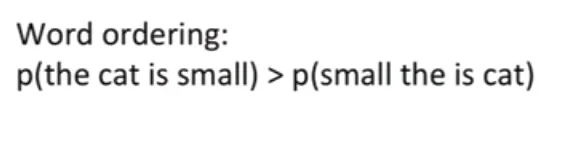

## Types of Language Models
There are primarily two types of Language Models:

1. Statistical Language Models: These models use traditional statistical techniques like N-grams, Hidden Markov Models (HMM) and certain linguistic rules to learn the probability distribution of words
2. Neural Language Models: These use different kinds of Neural Networks to model language


# Statistical Language Model

### N-gram

> An N-gram is a sequence of N tokens (or words)

#### Example 

Consider the following sentence: `“Innopolis University is a university located in the city of Innopolis.”`

* A 1-gram (or unigram) is a one-word sequence. For the above sentence, the unigrams would simply be: “Innopolis“,  “University“, “is“, “a“, “university“, “located“, “in“, “the“, “city“, “of“, “Innopolis“.

* A 2-gram (or bigram) is a two-word sequence of words, like “Innopolis University”, “university located”, or “located in”.


### Model

> If we have a good N-gram model, we can predict `p(w | h)` — what is the probability of seeing the word w given a history of previous words `h` — where the history contains `n-1` words.

Probability of a sentence after applying chain rule:
$$ P(x_0...x_m) = P(x_0) * P(x_1|x_0) * P(x_2|x_0x_1) ... = \prod_0^{m-1}{P(x_i|x_0...x_{i-1})} \text{, where } m \text{ - the sentence length.}$$ 

N-gram model simplifies this by limiting the preceding text to length N:

$$ P(x_m|x_0...x_{m-1}) \approx P(x_m|x_{m-n}...x_{m-1})$$

## Model implementation

In [1]:
# for those of you who run locally
# import nltk
# nltk.download('reuters', quiet=True)

In [2]:
%%capture 
# for those of you who run on kaggle
import subprocess
import nltk
# Download and unzip reuters
try:
    nltk.data.find('reuters.zip')
except:
    nltk.download('reuters', download_dir='/kaggle/working/', quiet=True, force=True)
    command = "unzip /kaggle/working/corpora/reuters.zip -d /kaggle/working/corpora"
    result = subprocess.run(command.split(), capture_output = True, text = True )
    nltk.data.path.append('/kaggle/working/')


In [3]:
from nltk.corpus import reuters
from nltk import bigrams, trigrams
from collections import Counter, defaultdict

# Create a placeholder for model
model = defaultdict(lambda: defaultdict(lambda: 0))

# Count frequency of co-occurance  
for sentence in reuters.sents():
    lower_sentence = [word.lower() for word in sentence]
    for word1, word2, word3 in trigrams(lower_sentence, pad_right=True, pad_left=True):
        model[(word1, word2)][word3] += 1
        
        
# Let's transform the counts to probabilities
for word1_word2 in model:
    total_count = float(sum(model[word1_word2].values()))
    for word3 in model[word1_word2]:
        model[word1_word2][word3] /= total_count

In [4]:
import random

# starting words
text = ["today", "the"]
sentence_finished = False
 
while not sentence_finished:
    # select a random probability threshold  
    probability_threshold = random.random()
    accumulator = .0

    for word in model[tuple(text[-2:])].keys():
        accumulator += model[tuple(text[-2:])][word]
        
        # select words that are above the probability threshold
        if accumulator >= probability_threshold:
            text.append(word)
            break

    if text[-2:] == [None, None]:
        sentence_finished = True

print (' '.join([t for t in text if t]))

today the emirate ' s u . s .


## Alternative model implementation

In [5]:
import string
from nltk.corpus import stopwords
from nltk import FreqDist


#  remove the n-grams with removable words
def remove_stopwords(ngrams, removal_list):     
    y = []
    for pair in ngrams:
        count = 0
        for word in pair:
            if word in removal_list:
                count = count or 0
            else:
                count = count or 1
        if (count==1):
            y.append(pair)
    return (y)

def pick_word(counter):
    "Chooses a random element."
    return random.choice(list(counter.elements()))


In [6]:
# input the reuters sentences
sents  = reuters.sents()
  
# write the removal characters such as : Stopwords and punctuation
stop_words = set(stopwords.words('english'))
string.punctuation = string.punctuation +'"'+'"'+'-'+'''+'''+'—'
string.punctuation
removal_list = list(stop_words) + list(string.punctuation)+ ['lt','rt']

In [7]:
# generate unigrams bigrams trigrams
unigram=[]
bigram=[]
trigram=[]
tokenized_text=[]
for sentence in sents:
    sentence = list(map(lambda x:x.lower(),sentence))
    for word in sentence:
        if word== '.':
            sentence.remove(word) 
        else:
            unigram.append(word)
    
    tokenized_text.append(sentence)
    bigram.extend(list(nltk.ngrams(sentence, 2,pad_left=True, pad_right=True)))
    trigram.extend(list(nltk.ngrams(sentence, 3, pad_left=True, pad_right=True)))

In [8]:
unigram = remove_stopwords(unigram, removal_list)
bigram = remove_stopwords(bigram,removal_list)
trigram = remove_stopwords(trigram,removal_list)
  

In [9]:
# generate frequency of n-grams 
freq_bi = FreqDist(bigram)
freq_tri = FreqDist(trigram)

In [10]:
d = defaultdict(Counter)
for a, b, c in freq_tri:
    if(a != None and b!= None and c!= None):
        d[(a, b)] += {(a, b, c) : freq_tri[a, b, c]}

In [11]:
# Next word prediction      
s=''

prefix = "today", "the"
print(" ".join(prefix))
s = " ".join(prefix)
for i in range(19):
    suffix = pick_word(d[prefix])[-1]
    s=s+' '+suffix
    print(s)
    prefix = prefix[1], suffix

today the
today the emirate
today the emirate '
today the emirate ' s
today the emirate ' s graphic
today the emirate ' s graphic arts
today the emirate ' s graphic arts group
today the emirate ' s graphic arts group for
today the emirate ' s graphic arts group for about
today the emirate ' s graphic arts group for about 1
today the emirate ' s graphic arts group for about 1 ,
today the emirate ' s graphic arts group for about 1 , 816
today the emirate ' s graphic arts group for about 1 , 816 tonnes
today the emirate ' s graphic arts group for about 1 , 816 tonnes the
today the emirate ' s graphic arts group for about 1 , 816 tonnes the previous
today the emirate ' s graphic arts group for about 1 , 816 tonnes the previous quarter
today the emirate ' s graphic arts group for about 1 , 816 tonnes the previous quarter ,
today the emirate ' s graphic arts group for about 1 , 816 tonnes the previous quarter , the
today the emirate ' s graphic arts group for about 1 , 816 tonnes the previou

## Competition

[Competition](https://www.kaggle.com/t/fa1721f91f524020a902f570d1a31c17)

Your task is to classify medical transcription into types of medical speciality with use of **N-grams**. 

> Hint: n-gram vectorization can be created with use of [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [12]:
import pandas as pd

train_df = pd.read_csv("/kaggle/input/nlp-week-4-n-grams/train.csv")
train_df.head()

,id,medical_specialty,transcription
0,0,Cardiovascular / Pulmonary,"PREOPERATIVE DIAGNOSIS: , Persistent pneumonia..."
1,1,General Medicine,"REASON FOR VISIT: , Mr. ABC is a 30-year-old m..."
2,2,Cardiovascular / Pulmonary,"REASON FOR CONSULTATION: , Mesothelioma.,HISTO..."
3,3,General Medicine,"DISCHARGE DIAGNOSES:,1. Chronic obstructive pu..."
4,4,Cardiovascular / Pulmonary,"CHIEF COMPLAINT:, The patient complains of che..."
